In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

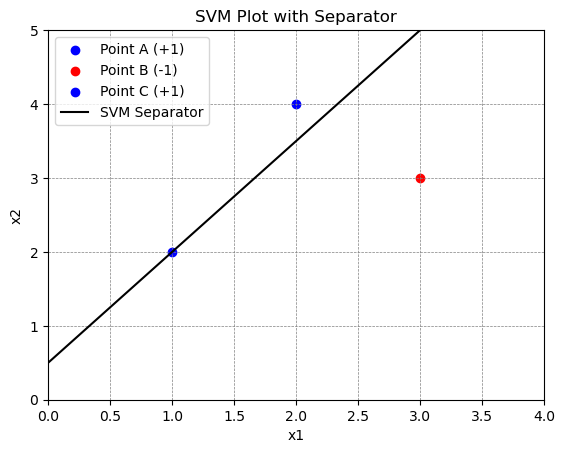

In [1]:
# Data points and labels
points = np.array([[1, 2], [3, 3], [2, 4]])  # A, B, C
labels = [1, -1, 1]  # +1 for A and C, -1 for B

# Plot points
for i, label in enumerate(labels):
    color = 'blue' if label == 1 else 'red'
    plt.scatter(points[i, 0], points[i, 1], color=color, label=f"Point {chr(65+i)} (+1)" if label == 1 else f"Point {chr(65+i)} (-1)")

x = np.linspace(0, 4, 100)
y = 1.5 * x + 0.5
plt.plot(x, y, '-k', label='SVM Separator')

# Graph settings
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.xlim(0, 4)
plt.ylim(0, 5)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('SVM Plot with Separator')
plt.legend()
plt.grid(color = 'gray', linestyle = '--', linewidth = 0.5)
plt.show()


# 1. Lets Create a Data Frame with 4 columns and around 24 to 30 records.

In [2]:
data_amazon = {
    "User_ID": range(1, 26),
    "Annual_Income": [
        45000, 30000, 60000, 25000, 90000, 120000, 35000, 70000, 45000, 80000,
        25000, 50000, 55000, 40000, 65000, 30000, 90000, 35000, 85000, 45000,
        25000, 100000, 55000, 75000, 40000
    ],
    "Credit_Score": [
        720, 650, 800, 500, 810, 750, 580, 720, 690, 770, 600, 700, 750, 680,
        730, 550, 800, 670, 780, 720, 500, 820, 710, 740, 690
    ],
    "Frequent_Category": [
        "Electronics", "Books", "Fashion", "Books", "Electronics", "Electronics", 
        "Fashion", "Electronics", "Books", "Fashion", "Books", "Electronics", 
        "Fashion", "Books", "Electronics", "Fashion", "Electronics", "Books",
        "Electronics", "Fashion", "Books", "Electronics", "Fashion", "Electronics", 
        "Books"
    ],
    "Apply_Credit_Card": [
        "Yes", "No", "Yes", "No", "Yes", "Yes", "No", "Yes", "No", "Yes", 
        "No", "Yes", "Yes", "No", "Yes", "No", "Yes", "No", "Yes", "Yes",
        "No", "Yes", "Yes", "Yes", "No"
    ]
}
df_amazon = pd.DataFrame(data_amazon)

In [3]:
df_amazon

,User_ID,Annual_Income,Credit_Score,Frequent_Category,Apply_Credit_Card
0,1,45000,720,Electronics,Yes
1,2,30000,650,Books,No
2,3,60000,800,Fashion,Yes
3,4,25000,500,Books,No
4,5,90000,810,Electronics,Yes
5,6,120000,750,Electronics,Yes
6,7,35000,580,Fashion,No
7,8,70000,720,Electronics,Yes
8,9,45000,690,Books,No
9,10,80000,770,Fashion,Yes


## Mapped If Customer applied to credit card to the Numerical Catgory like 1 or Yes and 0 for No

In [5]:
df_amazon['Apply_Credit_Card_Encoded'] = df_amazon['Apply_Credit_Card'].map({'Yes': 1, 'No': 0})

In [7]:
df_amazon

,User_ID,Annual_Income,Credit_Score,Frequent_Category,Apply_Credit_Card,Apply_Credit_Card_Encoded
0,1,45000,720,Electronics,Yes,1
1,2,30000,650,Books,No,0
2,3,60000,800,Fashion,Yes,1
3,4,25000,500,Books,No,0
4,5,90000,810,Electronics,Yes,1
5,6,120000,750,Electronics,Yes,1
6,7,35000,580,Fashion,No,0
7,8,70000,720,Electronics,Yes,1
8,9,45000,690,Books,No,0
9,10,80000,770,Fashion,Yes,1


### Splitting the Data Frame to X and Y

In [8]:
X = df_amazon[['Annual_Income', 'Credit_Score']]
y = df_amazon['Apply_Credit_Card_Encoded']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [11]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [12]:
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

### Mapping the Frequent Category to the Numerical Category.

In [15]:
category_mapping = {cat: idx for idx, cat in enumerate(df_amazon['Frequent_Category'].unique())}
df_amazon['Frequent_Category_Encoded'] = df_amazon['Frequent_Category'].map(category_mapping)

In [16]:
category_mapping

{'Electronics': 0, 'Books': 1, 'Fashion': 2}

In [17]:
df_amazon

,User_ID,Annual_Income,Credit_Score,Frequent_Category,Apply_Credit_Card,Apply_Credit_Card_Encoded,Frequent_Category_Encoded
0,1,45000,720,Electronics,Yes,1,0
1,2,30000,650,Books,No,0,1
2,3,60000,800,Fashion,Yes,1,2
3,4,25000,500,Books,No,0,1
4,5,90000,810,Electronics,Yes,1,0
5,6,120000,750,Electronics,Yes,1,0
6,7,35000,580,Fashion,No,0,2
7,8,70000,720,Electronics,Yes,1,0
8,9,45000,690,Books,No,0,1
9,10,80000,770,Fashion,Yes,1,2


In [18]:
kmeans = KMeans(n_clusters=3, random_state=42)
df_amazon['Cluster'] = kmeans.fit_predict(df_amazon[['Annual_Income', 'Frequent_Category_Encoded']])

/Users/mayureshdongare/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [19]:
df_amazon

,User_ID,Annual_Income,Credit_Score,Frequent_Category,Apply_Credit_Card,Apply_Credit_Card_Encoded,Frequent_Category_Encoded,Cluster
0,1,45000,720,Electronics,Yes,1,0,0
1,2,30000,650,Books,No,0,1,0
2,3,60000,800,Fashion,Yes,1,2,2
3,4,25000,500,Books,No,0,1,0
4,5,90000,810,Electronics,Yes,1,0,1
5,6,120000,750,Electronics,Yes,1,0,1
6,7,35000,580,Fashion,No,0,2,0
7,8,70000,720,Electronics,Yes,1,0,2
8,9,45000,690,Books,No,0,1,0
9,10,80000,770,Fashion,Yes,1,2,1


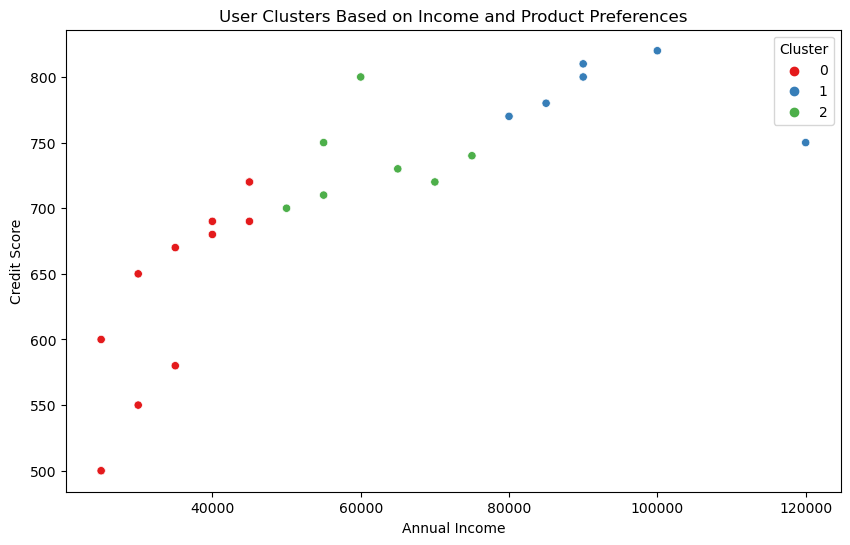

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Annual_Income', y='Credit_Score', hue='Cluster', data=df_amazon, palette='Set1'
)
plt.title("User Clusters Based on Income and Product Preferences")
plt.xlabel("Annual Income")
plt.ylabel("Credit Score")
plt.legend(title="Cluster")
plt.show()

In [24]:
accuracy

0.875

In [25]:
conf_matrix

array([[2, 1],
       [0, 5]])

In [28]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.83      1.00      0.91         5

    accuracy                           0.88         8
   macro avg       0.92      0.83      0.85         8
weighted avg       0.90      0.88      0.87         8



In [27]:
df_amazon[['User_ID', 'Cluster', 'Frequent_Category']]

,User_ID,Cluster,Frequent_Category
0,1,0,Electronics
1,2,0,Books
2,3,2,Fashion
3,4,0,Books
4,5,1,Electronics
5,6,1,Electronics
6,7,0,Fashion
7,8,2,Electronics
8,9,0,Books
9,10,1,Fashion
